# <font color='maroon'>Assessment</font>
Given the following dataset, answer the questions that follow. The necessary libraries have been imported.


In [330]:
import matplotlib.pyplot as plt
from numpy import arange
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import random as rnd
from random import sample 
import statistics as st

In [298]:
%matplotlib inline

In [299]:
data = pd.read_csv('athletes_.csv', sep=',', low_memory=False)

In [340]:
#data.info

In [300]:
pd.set_option('display.max_columns', None) 
data.head(5)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,645.0,300.0,NaN,196.0,NaN,NaN,245.0,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,465.0,NaN,1053.0,NaN,NaN,1081.0,205.0,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,NaN


### Question 1
Study the data. What is the size of the dataset?

In [301]:
data.shape
# 423006 rows x 28 columns

(423006, 28)

### Size of dataset: 423006 *Rows* *x* 28 *Columns*

#### Question 1.1
Generate summary statistics of the data.

In [302]:
data.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,423003.000000,331110.000000,1.598690e+05,229890.000000,5.542600e+04,3.027900e+04,4.074500e+04,1.935900e+04,2.973800e+04,2.224600e+04,3.609700e+04,1.044350e+05,9.728000e+04,1.153230e+05,1.105170e+05,5.060800e+04
mean,292748.166538,32.516750,1.206217e+02,170.896137,9.886691e+02,1.207950e+03,5.766025e+02,2.127863e+03,1.472252e+03,5.241279e+02,3.411464e+03,2.709107e+02,2.424957e+02,6.970503e+02,5.852109e+02,4.269613e+04
std,184969.660327,7.730671,2.097995e+04,58.379799,7.200430e+04,6.824091e+04,4.891145e+04,6.055021e+04,9.762688e+04,5.628804e+04,1.251980e+05,2.596882e+04,2.708942e+04,5.523235e+04,5.052976e+04,9.546078e+06
min,82.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+01,0.000000e+00,-5.000000e+02,-7.000000e+00,-6.000000e+00
25%,135091.500000,27.000000,6.600000e+01,145.000000,2.150000e+02,5.250000e+02,1.490000e+02,1.308000e+03,2.400000e+02,6.200000e+01,1.242000e+03,1.400000e+02,1.050000e+02,2.550000e+02,2.050000e+02,1.500000e+01
50%,275839.000000,31.000000,6.900000e+01,170.000000,2.900000e+02,5.950000e+02,1.930000e+02,1.550000e+03,2.940000e+02,7.100000e+01,1.380000e+03,1.950000e+02,1.450000e+02,3.450000e+02,2.750000e+02,2.700000e+01
75%,473188.000000,37.000000,7.200000e+01,192.000000,3.920000e+02,6.940000e+02,2.620000e+02,1.809000e+03,3.360000e+02,8.400000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,3.900000e+01
max,633083.000000,125.000000,8.388607e+06,20175.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09


#### Question 1.2
Are the any missing values?  A simple strategy would be to remove rows with missing values. This can however reduce the size of the dataset. Another technique is to imput missing values with a sensible value like the mean.

For more on how to deal with missing values, see this blog entry: [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/).

In [303]:
data.isnull().sum()

athlete_id                 3
name                   91896
region                171744
team                  267846
affiliate             181090
gender                 91896
age                    91896
height                263137
weight                193116
fran                  367580
helen                 392727
grace                 382261
filthy50              403647
fgonebad              393268
run400                400760
run5k                 386909
candj                 318571
snatch                325726
deadlift              307683
backsq                312489
pullups               372398
eat                   329074
train                 317175
background            324061
experience            318070
schedule              325131
howlong               313800
retrieved_datetime    114061
dtype: int64

### 1.2 The above Output shows the number of missing inputs amongst all of the columns

In [304]:
#data['height'] = data['height'].replace(0, data['height'].mean())
#data['height'].fillna(data['height'].mean(), inplace=True)
d= data['height']
d.dropna(inplace=True)
d.describe()

count    1.598690e+05
mean     1.206217e+02
std      2.097995e+04
min      0.000000e+00
25%      6.600000e+01
50%      6.900000e+01
75%      7.200000e+01
max      8.388607e+06
Name: height, dtype: float64

In [305]:
#There are some major outliers in the height data, so I limited the dataset to 99th percentile 
p = np.percentile(d, 99)
filtered = d[(d<= p) == True]
filtered.describe()



count    159043.000000
mean         67.880359
std           7.409877
min           0.000000
25%          66.000000
50%          69.000000
75%          71.000000
max          77.000000
Name: height, dtype: float64

### Question 2

Study the `height` column. What distribution does the data follow? 
Hint: Use a histogram or density plot to visualise the data.

## Please Note: Logarithmic scale on Y-Axis

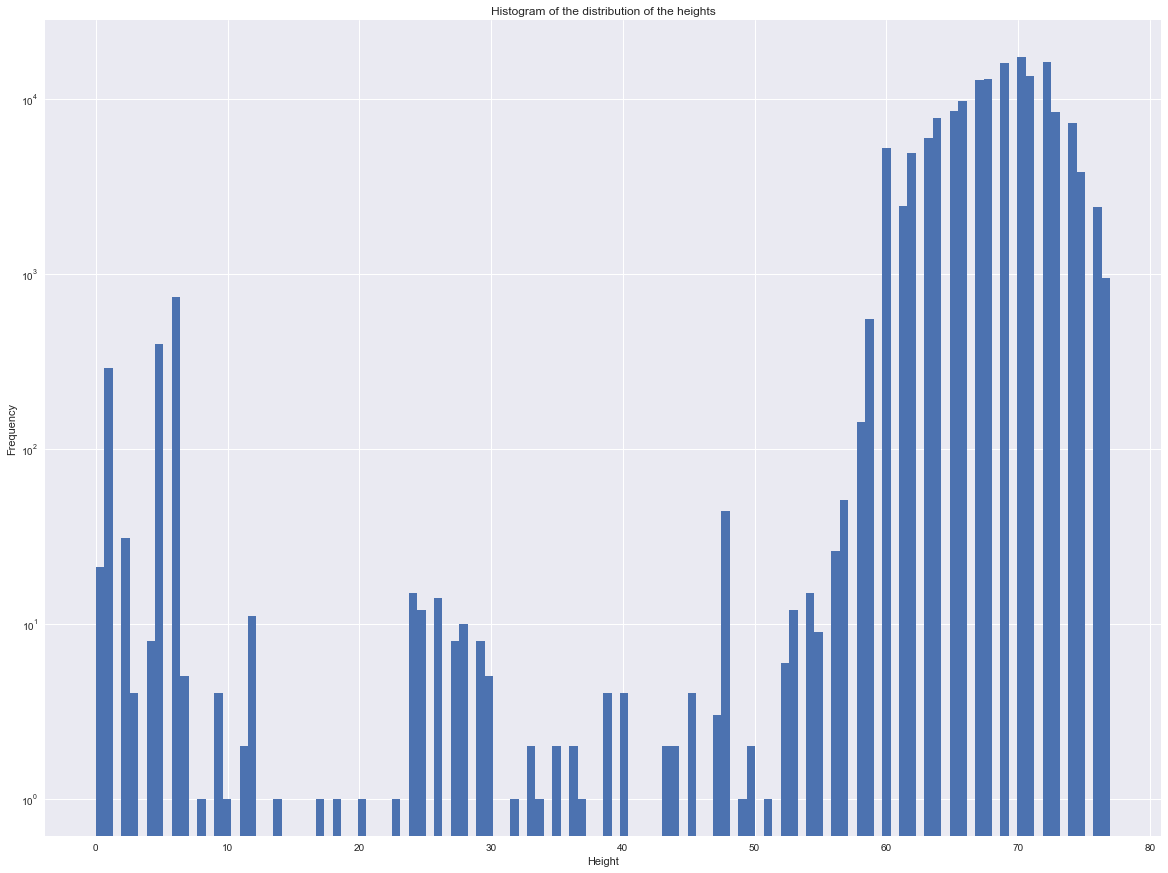

In [306]:
plt.figure(figsize=(20,15))
plt.hist(filtered, bins=120, log=True)
plt.xlabel('Height') 
plt.ylabel('Frequency') 
plt.title('Histogram of the distribution of the heights')

## Please Note: Figure below plotted without Logarithmic scale

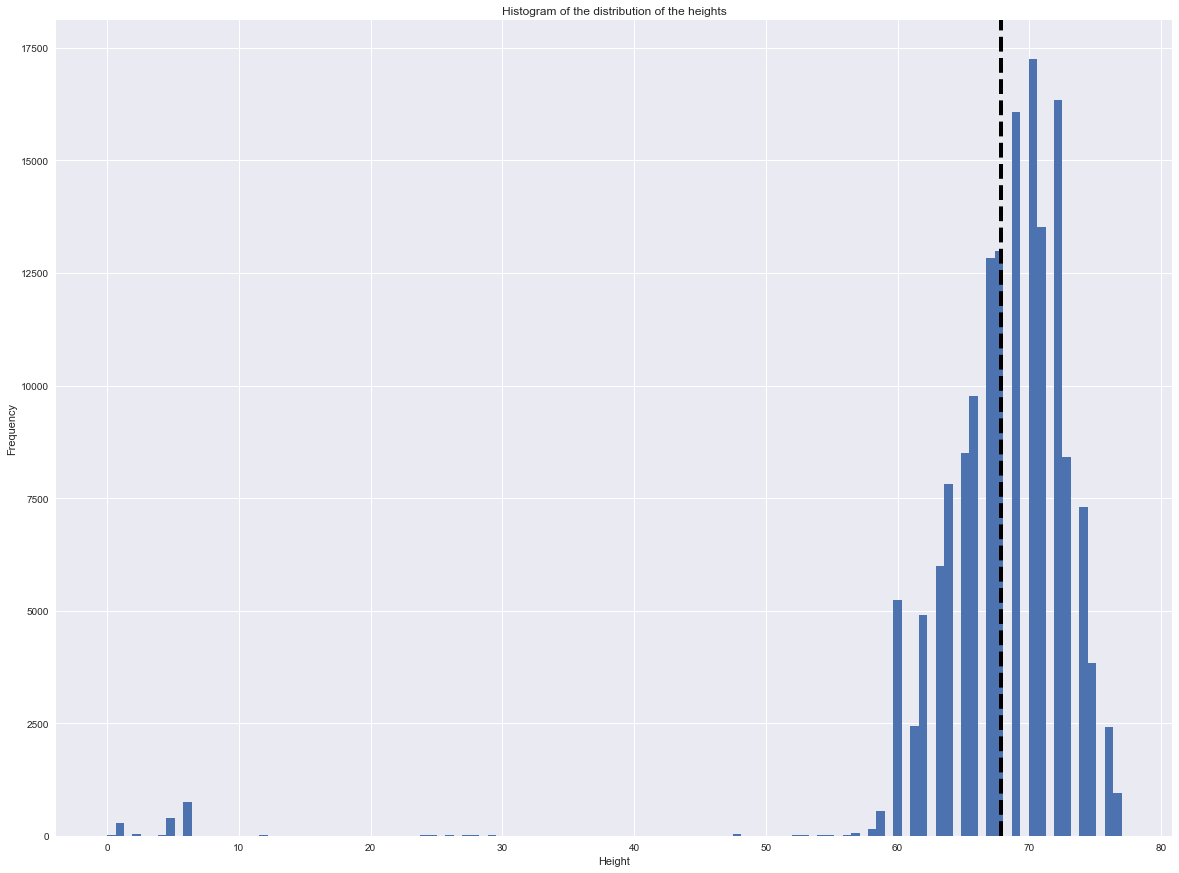

In [312]:
plt.figure(figsize=(20,15))
plt.axvline(filtered.mean(), color='k', linestyle='dashed', linewidth=4)
plt.hist(filtered, bins=120, log=False)
plt.xlabel('Height') 
plt.ylabel('Frequency') 
plt.title('Histogram of the distribution of the heights')

### From the histogram plotted above we see that the data follows a normal distribution

### Question 3
What is the average height?

In [311]:
average = filtered.mean()
print(average)

67.88035939965921


### Question 4

Use simple random sampling to sample from the dataset. Choose a sample of 20000.

In [338]:
random_samples = data['height'].sample(20000)
random_samples.shape

(20000,)

### Question 4

Use stratified sampling to sample from the dataset. Choose a sample of 20000.

In [291]:
strata = data.groupby('region').count()
groups, features = strata.shape
stratified = data.groupby('region').apply(lambda x: x.sample(frac=0.08))
stratified.shape

(20101, 28)

### Question 5
Compare simple random sampling and stratified random sampling. Compare the means generated by the two sampling techniques and discuss your observations below your code.

In [337]:
#Calculating mean height through random sampling
rs_mean = random_samples.mean()

#Calculating mean height through Stratified sampling
mean_array = []
df = pd.DataFrame(stratified['height'].unstack()).transpose()
for column in df.columns[1:]:
    mean_array.append(df[column].mean())
mean_df = pd.DataFrame(mean_array)
strat_mean = st.mean(mean_array)
print('Random Sampling Mean Height: {0} || Stratified Sampling Mean Height: {1}'.format(rs_mean, '%.4f'%strat_mean))


Random Sampling Mean Height: 68.49645 || Stratified Sampling Mean Height: 67.7795


Looking at the means of the different subgroups, we can tell there is a difference between means of random sampling and means from stratified random sampling. While random sampling involves randomly sampling from the population, this means that each possible sample is equally likely to occur. Stratified random sampling on the other hand, splits the population into smaller groups or strata based on shared characteristics, in this case 'region'. From this a random sample is taken from each stratum in direct proportion to the size of the stratum compared to the population.

Hence stratified random sampling tends to give more closer means to population mean in comparison to the population mean.

### Question 6 

In  this question we are going to implement cluster sampling. Data is divided into clusters, if it isn't already divided into clusters, and then we use simple random sampling to select a number of clusters from the sample. From the group of selected clusters, we again use simple random sampling to select random data points. These now form our sample.  

Let's implement this procedure using some randomly generated data that we are going to group into clusters.

In [293]:
n_clusters = 10
rand_data = stats.norm.rvs(loc=0,        # mean 0
                      scale=1,      # variance 1
                      size=100000,  # number of points
                      random_state=None)

rand_data = pd.DataFrame({'var1': rand_data})  # turn list into dataframe with heading var1

cluster = [rnd.randint(0,9) for c in range(100000)] # generate cluster numbers for grouping

n_col = pd.Series(cluster) # turn list into Series object
rand_data['cluster'] = n_col.values


Now that we've generated random data and placed the data into clusters, generate a sample from the *athletes* data using cluster sampling technique.

<!-- Distribution fitting with scipy exercise given a dataset. Good references about El Nino dataset. I should find a climate dataset.

https://stackoverflow.com/questions/6615489/fitting-distributions-goodness-of-fit-p-value-is-it-possible-to-do-this-with/16651524#16651524

https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python -->

In [295]:
cluster = [rnd.randint(0,20) for c in range(data.shape[0])] # generate cluster numbers for grouping

n_col = pd.Series(cluster) # turn list into Series object
data['cluster'] = n_col.values

c_cluster = rnd.randint(0,20) # Cluster to choose for sampling
cluster_data = data[(data['cluster'] == c_cluster) == True]
cl_mean = cluster_data['height'].mean()
print('Cluster chosen: {0}, Mean Height = {1}'.format(c_cluster, cl_mean))

Cluster chosen: 10, Mean Height = 68.33153856508278
